## 1. read nwb data

In [38]:
from pynwb import NWBHDF5IO

nwb_file_path = "D:/datasets/SpikeData/nwb_sample/sub-P17HMH_ses-20080501_ecephys_image.nwb"
io = NWBHDF5IO(nwb_file_path, mode="r", load_namespaces=True)
nwb_file = io.read()

D:\User\mrrai\.conda\envs\NeuralNWB\lib\site-packages\hdmf\backends\hdf5\h5tools.py:198: UserWarning: No cached namespaces found in D:/datasets/SpikeData/nwb_sample/sub-P17HMH_ses-20080501_ecephys_image.nwb
  warnings.warn(msg)


### Access stimulus data

In [39]:
nwb_file.stimulus

{'StimulusPresentation': StimulusPresentation pynwb.image.OpticalSeries at 0x2088952341552
 Fields:
   comments: no comments
   conversion: 1.0
   data: <HDF5 dataset "data": shape (200, 400, 300, 3), type "|u1">
   description: no description
   dimension: <HDF5 dataset "dimension": shape (3,), type "<i4">
   distance: 0.7
   field_of_view: <HDF5 dataset "field_of_view": shape (3,), type "<f8">
   format: raw
   interval: 1
   offset: 0.0
   orientation: lower left
   resolution: -1.0
   timestamps: <HDF5 dataset "timestamps": shape (200,), type "<f8">
   timestamps_unit: seconds
   unit: meters}

 In this file, `NWBFile.stimulus` contains a single key “`StimulusPresentation`” with an OpticalSeries object representing what images were shown to the subject and at what times. This `OpticalSeries` data contains `200` images of size `400x300` pixels with `three` channels (red, green, and blue).

In [40]:
stimulus_presentation = nwb_file.stimulus["StimulusPresentation"]
all_stimulus_data = stimulus_presentation.data[:]
all_stimulus_data.shape

(200, 400, 300, 3)

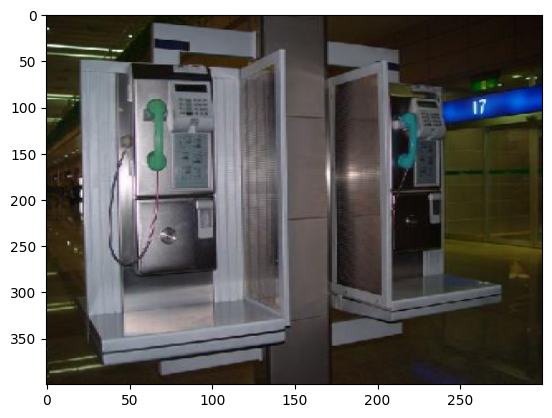

In [41]:
import matplotlib.pyplot as plt

frame_index = 150
image = all_stimulus_data[frame_index]
# Reverse the last dimension because the data were stored in BGR instead of RGB
image = image[..., ::-1]
plt.imshow(image, aspect="auto")

### Access single unit data
Data and metadata about sorted single units are stored in Units object. It stores metadata about each single unit in a tabular form, where each row represents a unit with spike times and additional metadata.

In [ ]:
units = nwb_file.units
units_df = units.to_dataframe()
units_df.info()

In [43]:
time_stamp = units["spike_times"][:]
type(time_stamp), len(time_stamp), type(time_stamp[1]), time_stamp[1].shape

(list, 43, numpy.ndarray, (383,))

### Access Trials
Trials are stored as TimeIntervals object which is a subclass of DynamicTable. DynamicTable objects are used to store metadata about each trial in a tabular form, where each row represents a trial and has a start time, stop time, and additional metadata.

In [ ]:
trials_df = nwb_file.trials.to_dataframe()
trials_df.info()

In [ ]:
assert np.all(stimulus_presentation.timestamps[:] == trials_df.stim_on_time[:])

In [ ]:
stim_on_times_landscapes = trials_df[
    trials_df.category_name == "landscapes"
].stim_on_time
for time in stim_on_times_landscapes.iloc[:5]:
    img = np.squeeze(
        stimulus_presentation.data[
            np.where(stimulus_presentation.timestamps[:] == time)
        ]
    )
    # Reverse the last dimension because the data were stored in BGR instead of RGB
    img = img[..., ::-1]
    plt.figure()
    plt.imshow(img, aspect="auto")

# Test Area
use other nwb files to test

In [77]:
import os
# 1. 先获得待查看的文件列表
root = "D:/datasets/SpikeData/nwb_sample/"
fls = os.listdir(root)
fls = [root+f for f in fls]
fls[0], len(fls)

('D:/datasets/SpikeData/nwb_sample/sub-210862_ses-20130626_behavior+ecephys+ogen.nwb',
 20)

In [187]:
from pynwb import NWBHDF5IO
f = fls[12]
io = NWBHDF5IO(f, mode="r", load_namespaces=True)
nwb_file = io.read()
nwb_trials = nwb_file.trials
if nwb_trials is not None:
    nwb_trials = nwb_trials.to_dataframe()
nwb_units = nwb_file.units
if nwb_units is not None:
    nwb_units = nwb_units.to_dataframe()
nwb_stimulus = nwb_file.stimulus
f

'D:/datasets/SpikeData/nwb_sample/sub-Jenkins_ses-medium_desc-train_behavior+ecephys.nwb'

In [188]:
nwb_file.acquisition

{}

In [189]:
nwb_stimulus

{}

In [190]:
import numpy as np
stim_on_times = np.array([])
if nwb_stimulus != {}:
    print("here")
    for k, v in nwb_stimulus.items():
        stim_on_times = v.timestamps[:]
        break
else:
    print("There")
    stim_on_times = nwb_trials["start_time"].values+0.5
stim_on_times.shape, stim_on_times[0], stim_on_times[1]

There


((250,), 0.5, 3.4)

In [192]:
nwb_units.info()
# nwb_file.acquisition["ElectricalSeries"].data[:].shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 152 entries, 1011 to 2951
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   heldout        152 non-null    bool  
 1   spike_times    152 non-null    object
 2   obs_intervals  152 non-null    object
 3   electrodes     152 non-null    object
dtypes: bool(1), object(3)
memory usage: 4.9+ KB


In [193]:
nwb_units_spikes=nwb_units["spike_times"]
u = 1
nwb_units_spikes.iloc[u], len(nwb_units_spikes.iloc[u])

(array([7.39900000e-01, 8.60133000e-01, 9.52533000e-01, ...,
        7.68436967e+02, 7.70372533e+02, 7.71551633e+02]),
 1322)

In [194]:
nwb_trials.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 250 entries, 0 to 249
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   start_time       250 non-null    float64
 1   stop_time        250 non-null    float64
 2   trial_type       250 non-null    int64  
 3   trial_version    250 non-null    int64  
 4   maze_id          250 non-null    int64  
 5   success          250 non-null    bool   
 6   target_on_time   250 non-null    float64
 7   go_cue_time      250 non-null    float64
 8   move_onset_time  250 non-null    float64
 9   rt               250 non-null    int64  
 10  delay            250 non-null    int64  
 11  num_targets      250 non-null    int64  
 12  target_pos       250 non-null    object 
 13  num_barriers     250 non-null    int64  
 14  barrier_pos      250 non-null    object 
 15  active_target    250 non-null    int64  
 16  split            250 non-null    object 
dtypes: bool(1), floa

In [195]:
nwb_trials.iloc[0]

start_time                                                       0.0
stop_time                                                      2.836
trial_type                                                         8
trial_version                                                      1
maze_id                                                           22
success                                                         True
target_on_time                                                 0.776
go_cue_time                                                    1.258
move_onset_time                                                1.634
rt                                                               376
delay                                                            482
num_targets                                                        1
target_pos                                             [[-111, -68]]
num_barriers                                                       9
barrier_pos        [[78, -78, 14, 

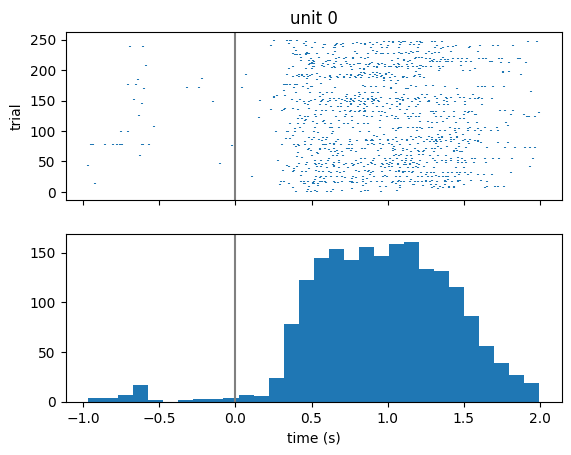

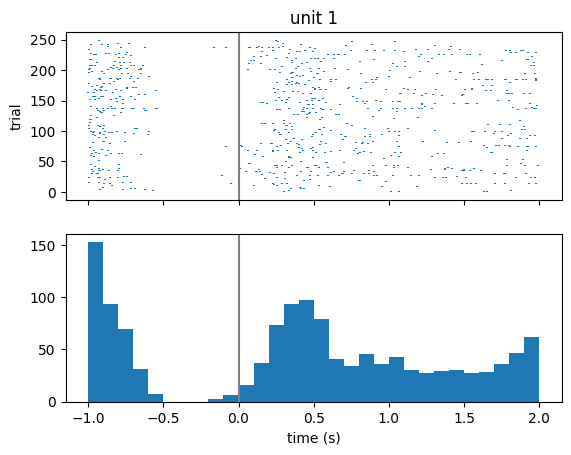

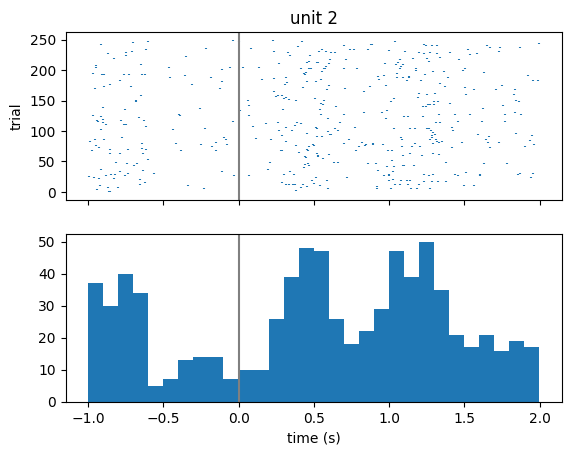

In [196]:
import numpy as np
import matplotlib.pyplot as plt
before = 1  # in seconds
after = 2

for unit in range(3):
    unit_spike_times = nwb_units_spikes.iloc[unit]
    trial_spikes = []
    for time in stim_on_times:
        # Compute spike times relative to stimulus onset
        aligned_spikes = unit_spike_times - time
        # Keep only spike times in a given time window around the stimulus onset
        aligned_spikes = aligned_spikes[
            (-before < aligned_spikes) & (aligned_spikes < after)
        ]
        trial_spikes.append(aligned_spikes)
    fig, axs = plt.subplots(2, 1, sharex="all")
    plt.xlabel("time (s)")
    axs[0].eventplot(trial_spikes)

    axs[0].set_ylabel("trial")
    axs[0].set_title("unit {}".format(unit))
    axs[0].axvline(0, color=[0.5, 0.5, 0.5])

    axs[1].hist(np.hstack(trial_spikes), 30)
    axs[1].axvline(0, color=[0.5, 0.5, 0.5])

In [57]:
np.array([0.4, 0.9, 1.2])+0.3

array([0.7, 1.2, 1.5])